<img src="https://apps.novasbe.pt/NovaMobility/resources/assets/images/nova_logo.png" width="300">
<author = "Claudio Haupt Vieira">
<license = "https://creativecommons.org/licenses/by-nc/3.0/"> 

# Instructions

1. Press `'File' -> 'Rename notebook'` and rename to your student id (ex: 40000.ipynb)
2. Complete assignment
3. Perform last validation by restarting kernel and running all cells before submission
4. Save the .ipynb file by clicking `'File' -> 'Save notebook'` and submit it via Moodle

**It is important that you DO NOT CHANGE the autograder tests (start with test_) nor other imported functions (such as load_news_dataset)**


# Assignment 3 - Sentiment Analysis on cryptocurrency headline dataset

Sentiment analysis techniques allow identifying emotional dimensions from pieces of text of natural languages. While it is an obvious task for a human reader, it is significantly harder task for computers to perform, as strings exist as binary code in computer memory and have no inherent meaning. 

How can we compute sentiment from strings? Humans have to inform computers on how "positive" or "negative" a given word is. Fortunately, there are several crowdsourced efforts of word sentiment annotation, which are freely available and are relatively easy to use!

In this assignment you will leverage your knowledge on Python functions and dictionaries in order to obtain the sentiment of news articles related to cryptocurrencies, which pricing is largely determined by collective mood.


In [1]:
# Run this cell to import the dataset and autograder tests
from tests_assignment_3 import * 

The dataset consists of ~190k cryptocurrency news headlines extracted from several different online media, from 2013 to 2017, mostly from english sources. The data is structured as list of dicts, where each dict contains two keys: `publishdate` and `headlinetext`. 

In [2]:
news = load_news_dataset()  # Run this!

In [3]:
news[0:5]

[{'publishdate': 20130504,
  'headlinetext': 'COnSTELlATIon DaG iS nOW liStEd On kucoiN eXC?haNGE'},
 {'publishdate': 20130511,
  'headlinetext': 'ItA*lys cRypTOCUrREnCy BITgrAil suspeNds OpERatIOnS'},
 {'publishdate': 20130511,
  'headlinetext': 'THe diffeRENCe bETWEEn sHarEs aNd cRYpToCUrReN€CiES'},
 {'publishdate': 20130512,
  'headlinetext': 'fedS seIzE 47 mIlLION In bItCoinS in FAke ID ST=ing'},
 {'publishdate': 20130514,
  'headlinetext': 'ThE diG sTarteD ASiCboOST neTwORK AnD b@ItcoIN cAsH'}]

The headlines text obviously needs to be fixed! While the headlines are readable for a human, in programming strings are case-sensitive, e.g. "bItCoinS" is not equal to "bitcoins".

In the first part of the assignment you will create four functions that should be able to help with cleaning natural language strings.

# Data cleaning

## Exercise 1 - Cleaning strings

### Description

Human-generated text data generally is generally noisy. Before obtaining sentiment from strings, we have to ensure strings are in its simplest possible form.

If we are given a noisy string, such as:

```python
"LUKE!!11!!1! I am your father..."
```

a cleaned string would look like:

```python
"luke i am your father"
```

### Instructions

Write a function, `clean_string` with the following requirements:

- should have one string argument
- should return lowercase string with only alphabetical (a-z) characters and spaces (" ")

Note that `clean_string` should always return a string, even if we provide an empty string as input.

Example usage:

```ipython
clean_string("THERE IS NO SPOON!")
>> "there is no spoon"

clean_string("")
>> ""
```

Hints:
- [str alphabetical](https://stackoverflow.com/questions/15558392/how-can-i-check-if-character-in-a-string-is-a-letter-python)
- [str lowercase](https://stackoverflow.com/questions/6797984/how-do-i-lowercase-a-string-in-python)
- Work on a new string (You can create empty strings!) rather than change the input string 
- Pay attention to the spaces:
```python
space = ' '
space.isalpha()
>> False
```

In [64]:
values = list("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ ")

def clean_string(string):
    for c in string:
        if c not in values:
            mystring = string.replace(c, "")
    return str(string.lower())

# I can also write the function this way

def clean_string(string = "THERE IS NO SPOON!"):
    word = ''
    for c in string:
        if c.isalpha() or c == " ":
            word += c
    return word.lower()

clean_string()

'there is no spoon'

In [65]:
test_clean_string(clean_string)

All basic tests passed!


<br>

## Exercise 2 - Tokenization

### Description

Words are the main unit of natural language, but our strings contain whole sentences. Each sentence string should be split by its words.


### Instructions
In this exercise you will write a function `tokenize` that given a string, will split (at spaces) the string into a list of its substrings.

Example usage:

```python
tokenize("hello darkness my old friend")
>> ["hello", "darkness", "my", "old", "friend"]

tokenize("hello, world")
>> ["hello,", "world"]

tokenize("")
>> []
```


Hint: 
- [str.split](https://www.datacamp.com/community/tutorials/python-string-split)

In [66]:
def tokenize(string):
    return string.split()

tokenize("")

[]

In [67]:
test_tokenize(tokenize)

All basic tests passed!


<br>

## Exercise 3 - Preprocessing function

### Description
We got two functions that apply transformations on strings and can work in chain - what we call function pipeline, where the output of one function serves as the input of the next function. So, instead of having these two functions, we can pipeline these into a single function that can preprocess any given string.

What is pipelining? For example, the following code chains two functions, `add` and `divide_by_10`, wrapped in the pipeline `add_divide_by_10` function.

```ipython
def add(num1, num2):
    return num1 + num2

def divide_by_10(num):
    return num / 10
    
def add_divide_by_10(a, b)
    addition = add(a, b) 
    division = divide_by_10(addition)  # output of add() is input of division()
    return division

add_divide_by_10(10, 10)
>> 2
```


### Instructions
 In this exercise you will define the `preprocess_string` function, with the following requirements:
 
- accepts one string argument
- should call two functions, `clean_string` and `tokenize`
- should return a list with preprocessed tokens

Example usage
```python
preprocess_string("Hell11o!!)
>> ["hello"]

preprocess_string("THERE IS NO SP00OON")
>> ["there", "is", "no", "spoon"]

preprocess_string("")
>> []
```


In [71]:
def preprocess_string(string):
    cleanstring = clean_string(string)
    listed = tokenize(cleanstring)
    return listed

preprocess_string("THERE IS NO SP00OON")

['there', 'is', 'no', 'spoon']

In [72]:
test_preprocess_string(preprocess_string)

All basic tests passed!


<br>

## Exercise 4 - Storing preprocessed strings

### Description

We are all set to preprocess strings. Recall the `news` headlines dataset with all these noisy strings... We can clean these using the `preprocess_string` function. However, we might want to use the preprocessed strings later when performing sentiment analysis, so we should write a function to store the preprocessed strings.

### Instructions

In this exercise you are going create a function `add_preprocessed_headlines` with the following requirements:
- accepts one `list` argument, named `dataset`  
- assuming there are `dicts` in the input `dataset` list, add the key `proc_headlinetext`, where the value is the output of the `preprocess_string` function on `headlinetext`.
- return the updated list of dicts. 

Finally, **run the function on `news` dataset, and store the result to `proc_news` variable**.

Example dict record:

```python
[
    {
        "publishdate": 20130504,
        "headlinetext": "ItA*lys cRypTOCUrREnCy BITgrAil suspeNds OpERatIOnS",
        "proc_headlinetext": [
            "italys",
            "cryptocurrency",
            "bitgrail",
            "suspends",
            "operations",
        ],
    }
]
```

In [75]:
def add_preprocessed_headlines(dataset):
    for element in dataset:
        target = element["headlinetext"]
        element["proc_headlinetext"] = preprocess_string(target)
    return dataset

proc_news = add_preprocessed_headlines(news)

In [76]:
test_add_preprocessed_headlines(add_preprocessed_headlines, proc_news)

All basic tests passed!


--- 

# Sentiment Analysis

There are a couple sentiment analysis dictionaries described in the scientific literature that are freely available [[1]](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/6006/pdf/imm6006.pdf)[[2]](https://arxiv.org/abs/1103.2903), but are typically limited to the positive-negative polarity. In this assignment we will use a more complete dictionary - the NRC Emotion Lexicon [[3]](https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm) is a dictionary of 14181 English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive). These annotations were manually done by crowdsourcing.

In [83]:
sentiment = load_sentiment_dict()  # Run this!

The `sentiment` data is structured as a dict of dicts. For each of the word 14181 words in the dictionary there are 10 different keys representing sentiments, where each value is either 0 or 1, according to the annotation of a given sentiment (1) or not (0)


In [84]:
sentiment["good"]  # "good" sentiment is annotated with anticipation, surprise and trust.

{'anger': 0,
 'anticipation': 1,
 'disgust': 0,
 'fear': 0,
 'joy': 1,
 'negative': 0,
 'positive': 1,
 'sadness': 0,
 'surprise': 1,
 'trust': 1}

In [85]:
sentiment["bad"]  # "bad" sentiment is annotated with anger, disgust, negative and sadness.

{'anger': 1,
 'anticipation': 0,
 'disgust': 1,
 'fear': 1,
 'joy': 0,
 'negative': 1,
 'positive': 0,
 'sadness': 1,
 'surprise': 0,
 'trust': 0}

So, given a sentence like `"im mad as hell"`, we can check each word if it is annotated in the `sentiment` dict

In [86]:
for word in ["im", "mad", "as", "hell"]:
    if word in sentiment.keys():   # confirm if word is annotated in the dictionary
        print(word, sentiment[word])

mad {'anger': 1, 'anticipation': 0, 'disgust': 1, 'fear': 1, 'joy': 0, 'negative': 1, 'positive': 0, 'sadness': 1, 'surprise': 0, 'trust': 0}
hell {'anger': 1, 'anticipation': 0, 'disgust': 1, 'fear': 1, 'joy': 0, 'negative': 1, 'positive': 0, 'sadness': 1, 'surprise': 0, 'trust': 0}


found two matches in sentiment dict, displaying respective sentiment scores. By summation, we obtain

> anger = 2, disgust = 2, fear = 2, negative = 2, sadness = 2

... a very negative sentence!

---

## Exercise 5 - Get sentiment scores from a list of strings

### Description
We can automate sentiment extraction from any given string written in English just by looking up its words in a sentiment dict. In this exercise you will automate the sentiment analysis process using the `sentiment` dict as described above.

### Instructions
Write a function `get_sentiment` with the following requirements:

- Should accept 2 arguments: 
    - a list of strings (e.g. string tokens)
    - a word dictionary containing 10 sentiment values (like `sentiment` dict)
- For each string in the list, it should **look for that string in the sentiment dict** and if that word is in the sentiment dict, sum the value of each sentiment of that word to the base dictionary inside the function.
- We setup the `base` dictionary below. This function should **return the base dictionary** containing the sentiment as key, and the respective sum as value.

Example usage:

```ipython
sentiment = load_sentiment_dict() 
get_sentiment(["im", "mad", "as", "hell"], sentiment)
>> 
    {
        "anger": 2,
        "anticipation": 0,
        "disgust": 2,
        "fear": 0,
        "joy": 0,
        "negative": 2,
        "positive": 0,
        "sadness": 2,
        "surprise": 0,
        "trust": 0,
    }

```


In [90]:
def get_sentiment(wlist, sentiment):
    
    base = {
        "anger": 0,
        "anticipation": 0,
        "disgust": 0,
        "fear": 0,
        "joy": 0,
        "negative": 0,
        "positive": 0,
        "sadness": 0,
        "surprise": 0,
        "trust": 0,
    }

    for word in wlist:
        if word in sentiment.keys():   # confirm if word is annotated in the dictionary
            for emotion in sentiment[word]:
                base[emotion] += sentiment[word][emotion]
    return base

get_sentiment(["im","mad","as","hell"],sentiment)

{'anger': 2,
 'anticipation': 0,
 'disgust': 2,
 'fear': 2,
 'joy': 0,
 'negative': 2,
 'positive': 0,
 'sadness': 2,
 'surprise': 0,
 'trust': 0}

In [91]:
test_get_sentiment(get_sentiment, sentiment)

All basic tests passed!


---

## Exercise 6  - Sentiment scores normalization

### Description
Headlines lenght is variable. We should normalize the sentiment scores because longer headlines will tend to have greater scores (because we're summing the sentiment of each word in a sentence) and are not comparable to shorter headlines. Thus, we normalize the score by the square root of the lenght of the sentence (eg. number of words). In Python the square root can be computed as follows:
```ipython
from math import sqrt
sqrt(4)
>> 2
```
### Instructions

Write a function `get_normalized_sentiment` with the following requirements:
- Should accept 2 arguments
    - a list of strings (e.g. tokens)
    - a dictionary of dicts such as `sentiment` dict
- Should call the `get_sentiment` function to compute sentiment scores.
- Normalization is obtained by dividing the sentiment score by the square root of the number of words in a sentence (number of strings in your input list)


Example usage:
```ipython
get_normalized_sentiment(["im", "mad", "as", "hell"], sentiment)
>> 
    {
        "anger": 1.0,
        "anticipation": 0.0,
        "disgust": 1.0,
        "fear": 1.0,
        "joy": 0.0,
        "negative": 1.0,
        "positive": 0.0,
        "sadness": 1.0,
        "surprise": 0.0,
        "trust": 0.0,
    }
```

Note that the example list has 4 words, so the sentiment score is divided by 2 (sqrt of 4).

In [100]:
base = get_sentiment(["im", "mad", "as", "hell"],sentiment)
sentiment

2

In [101]:
from math import sqrt

def get_normalized_sentiment(wlist, sentiment):
    base = get_sentiment(wlist,sentiment)
    for word in base.keys():
        base[word] = base[word]/sqrt(len(wlist))
    return(base)

get_normalized_sentiment(["im", "mad", "as", "hell"], sentiment)

{'anger': 1.0,
 'anticipation': 0.0,
 'disgust': 1.0,
 'fear': 1.0,
 'joy': 0.0,
 'negative': 1.0,
 'positive': 0.0,
 'sadness': 1.0,
 'surprise': 0.0,
 'trust': 0.0}

In [102]:
test_get_normalized_sentiment(get_normalized_sentiment, sentiment)

All basic tests passed!


---

## Storing sentiment and normalized sentiment scores

With the functions we defined above we can now automate sentiment analysis on any given string. Lets apply it to the `proc_news` dataset and store the result in each dict of the dataset.

In [103]:
# Run this cell!

sentiment_news = []

for new in proc_news:
    new['sentiment'] = get_sentiment(new['proc_headlinetext'],sentiment)
    new['norm_sentiment'] = get_normalized_sentiment(new['proc_headlinetext'],sentiment)
    sentiment_news.append(new)

In [104]:
# check how the new updated list of dictionaries looks like
sentiment_news[42] 

{'publishdate': 20131205,
 'headlinetext': 'GYfTS tarGeT! GIFT cArdS FOr thE tarGet coRpORatION',
 'proc_headlinetext': ['gyfts',
  'target',
  'gift',
  'cards',
  'for',
  'the',
  'target',
  'corporation'],
 'sentiment': {'anger': 0,
  'anticipation': 1,
  'disgust': 0,
  'fear': 0,
  'joy': 1,
  'negative': 0,
  'positive': 2,
  'sadness': 0,
  'surprise': 1,
  'trust': 1},
 'norm_sentiment': {'anger': 0.0,
  'anticipation': 0.35355339059327373,
  'disgust': 0.0,
  'fear': 0.0,
  'joy': 0.35355339059327373,
  'negative': 0.0,
  'positive': 0.7071067811865475,
  'sadness': 0.0,
  'surprise': 0.35355339059327373,
  'trust': 0.35355339059327373}}

---

## Exercise 7 - Group by date
### Description
We generated a normalized sentiment score which is comparable across diferent headlines - we can start extracting some insights about our data. 

For instance, we want to know which dates had highest normalized sentiment scores. But before we can do that, we need aggregate all the sentiment scores for a given date.

Thus, we should sum the sentiment scores of all headlines of a given `publishdate` and store it in an appropriate data structure - a dictionary.
### Instructions

Write a function, `get_sentiment_per_date` with the following requirements:
- Should accept one list argument (eg. the `sentiment_news` list created before) and a specific date (int) in the format YYYYMMDD (eg. 20130511) (this date is to match the `publishdate` in the headlines)
- Returns a dict with the sentiments, and the values are the sum of `norm_sentiment` of all headlines that were published in that specific `publishdate`.


Example usage:

```ipython
get_sentiment_per_date(proc_news, 20130511)
>> {
    "anger": 0.6106834314459479,
    "anticipation": 0.2773500981126146,
    "disgust": 0.0,
    "fear": 0.9440167647792812,
    "joy": 0.0,
    "negative": 1.2773500981126147,
    "positive": 0.35355339059327373,
    "sadness": 0.0,
    "surprise": 0.6309034887058883,
    "trust": 0.35355339059327373,
}
```


In [109]:
def get_sentiment_per_date(proc_news, date):
    base = {
        "anger": 0,
        "anticipation": 0,
        "disgust": 0,
        "fear": 0,
        "joy": 0,
        "negative": 0,
        "positive": 0,
        "sadness": 0,
        "surprise": 0,
        "trust": 0,
    }
    
    for element in proc_news:
        if element["publishdate"] == date:
            for value in element["norm_sentiment"]:
                base[value] += element["norm_sentiment"][value]
    return base

get_sentiment_per_date(proc_news, 20130511)

{'anger': 0.0,
 'anticipation': 0.0,
 'disgust': 0.0,
 'fear': 0.0,
 'joy': 0.0,
 'negative': 0.0,
 'positive': 0.0,
 'sadness': 0.0,
 'surprise': 0.0,
 'trust': 0.0}

In [110]:
test_get_sentiment_per_date(get_sentiment_per_date)

All basic tests passed!


### Now that you are done we will show you how to take full advantage of your data. 

With the function you created in question 7 you could now easily calculate the sentiment per day for all the days and then plot that data to see sentiment trend over time. 

Read and understand the next lines of code and then run it to see your output and the graphs you can generate.

In [111]:
# Run this cell!

unique_dates = set()
for new in proc_news:
    unique_dates.add(new['publishdate'])

aggregate_dict = dict()

for date in unique_dates:
    aggregate_dict[date] = get_sentiment_per_date(proc_news, date)

We can now access the sentiment of any given date in the `aggregate_dict`

In [112]:
aggregate_dict[20160512] # Run this cell!

{'anger': 1.6410736577979872,
 'anticipation': 2.4862508678966213,
 'disgust': 0.9712925011878754,
 'fear': 2.48719634240079,
 'joy': 1.2602445307961192,
 'negative': 1.5743151903434027,
 'positive': 5.133105056528905,
 'sadness': 0.6697811566101117,
 'surprise': 1.8584889281968042,
 'trust': 3.9420081390647916}

In [113]:
aggregate_dict[20160513] # Run this cell!

{'anger': 0.5901864791725766,
 'anticipation': 3.2929968439629533,
 'disgust': 0.30151134457776363,
 'fear': 1.2250311570836736,
 'joy': 0.5901864791725766,
 'negative': 2.6550647351710372,
 'positive': 5.472136602740475,
 'sadness': 0.9681780112444303,
 'surprise': 0.30151134457776363,
 'trust': 2.9320325470300634}

## Visualization time

If you have sucessfuly completed all the exercises, below there's an example of could be done with the sentiment information you just computed for 200k different cryptocurrency-related headlines.

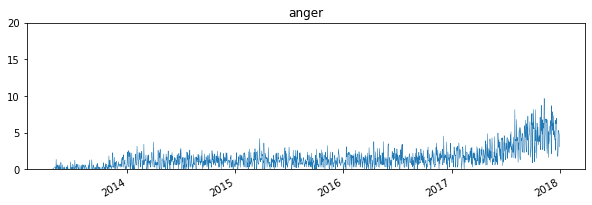

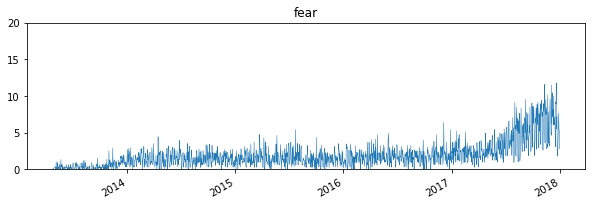

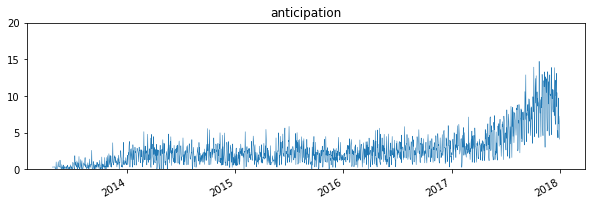

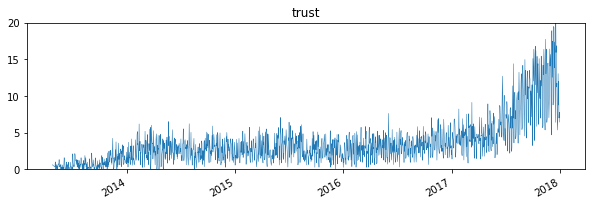

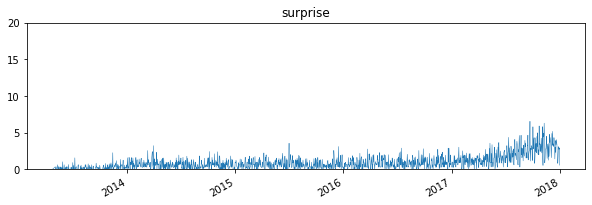

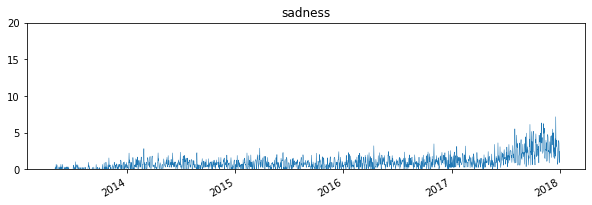

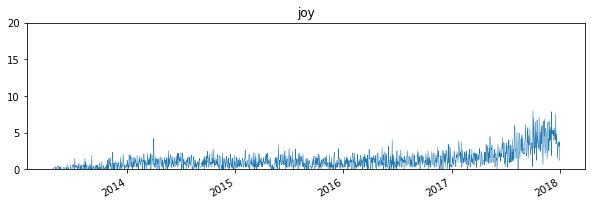

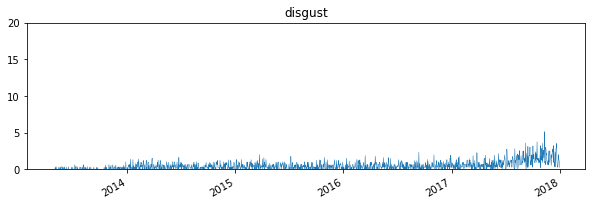

In [114]:
# Run this!
plot_sentiment_over_time(get_sentiment_per_date, sentiment_news)